In [7]:
from sklearn.datasets import make_regression
import numpy as np

In [8]:
x,y=make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

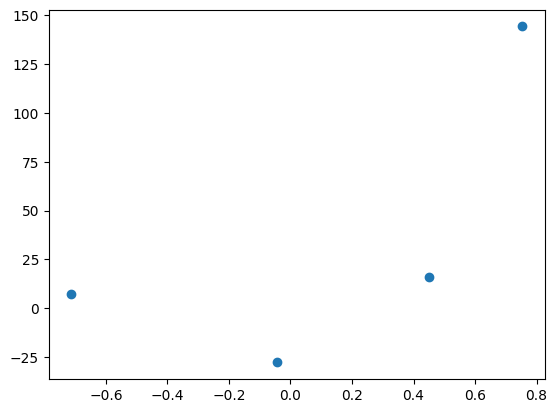

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

lets apply OLs

In [10]:
from sklearn.linear_model import LinearRegression


In [11]:
reg=LinearRegression()
reg.fit(x,y)
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None,normalize=False)

LinearRegression(normalize=False)

In [12]:
reg.coef_

array([78.35063668])

In [13]:
reg.intercept_

26.15963284313262

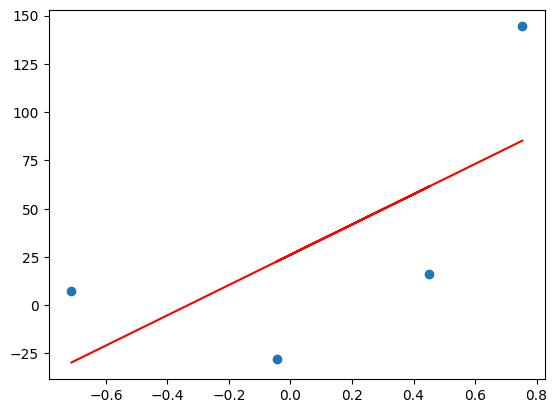

In [14]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red')

lets apply gradiant decent assuming that slope is constant m=78.35
and lets assume and starting value for intercept b=0

In [15]:
y_pred=((78.35*x)+0).reshape(4)

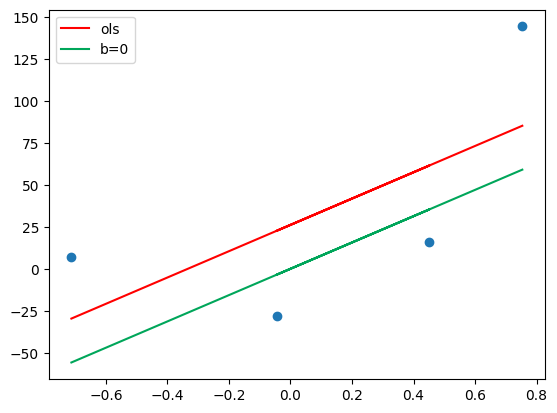

In [16]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='ols')
plt.plot(x,y_pred,color='#00a65a',label='b=0')
plt.legend()
plt.show()

In [17]:
m=78.35
b=0
loss_slope= -2 * np.sum(y-m*x.ravel() -b)
loss_slope

-209.27763408209216

In [18]:
# lets take learning rate=0.1
lr=0.1

step_size=loss_slope*lr
step_size

-20.927763408209216

In [19]:
#calculate new intercept 
b=b-step_size
b

20.927763408209216

In [20]:
y_pred1=((78.35*x)+b).reshape(4)

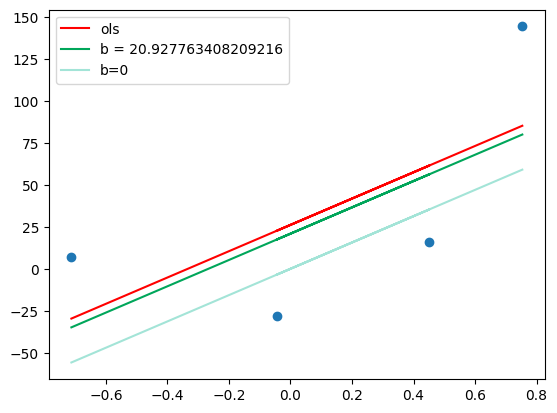

In [21]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='ols')
plt.plot(x,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label='b=0')
plt.legend()
plt.show()

In [22]:
#iteration 2
loss_slope=-2*np.sum(y-m*x.ravel()-b)
loss_slope

-41.85552681641843

In [23]:

step_size=loss_slope*lr
step_size

-4.185552681641844

In [24]:
b=b-step_size
b

25.11331608985106

In [25]:
y_pred2=((78.35*x)+b).reshape(4)

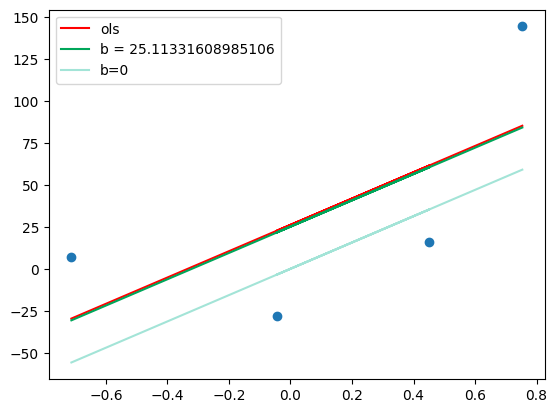

In [26]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='ols')
plt.plot(x,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label='b=0')
plt.legend()
plt.show()

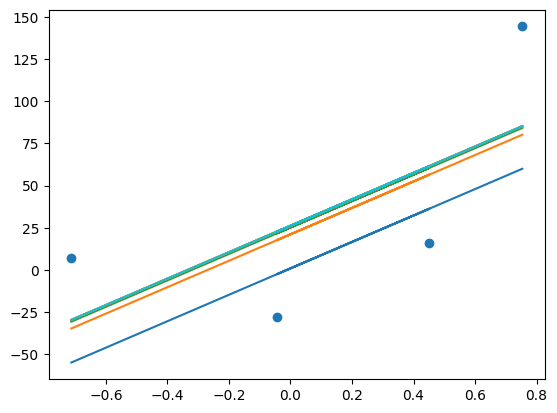

In [27]:
# do same on using loop
b=-100
m=78.35
lr=0.1
epochs=10

for i in range(epochs):
    loss_slope=-2*np.sum(y-m*x.ravel()-b)
    b=b-(lr*loss_slope)
    
    y_pred=m*x +b
    plt.plot(x,y_pred)
plt.scatter(x,y)    

make a gd regressor class and implement gd regression 

In [28]:
x2,y2=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

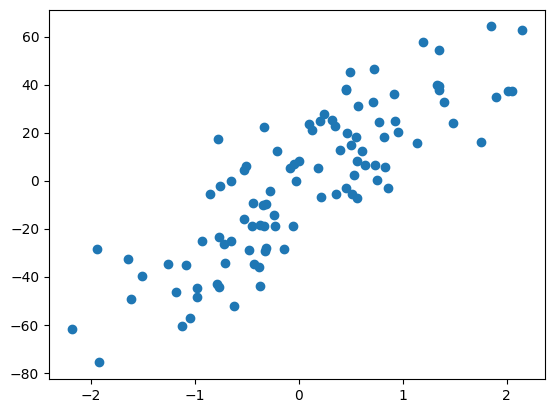

In [29]:
plt.scatter(x2,y2)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr=LinearRegression()

In [31]:
lr.fit(x2,y2)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [32]:



class GDRegressor:
    
    def __init__(self,learing_rate,epochs):
        self.m=27.82
        self.b=-120
        self.lr=learing_rate
        self.epochs=epochs 
        
    def fit(self,x2,y2):
        for i in range(self.epochs):
            loss_slope=-2*np.sum(y2-self.m*x2.ravel()-self.b)
            self.b=self.b-(self.lr*loss_slope)
            print(loss_slope,self.b)
        print(self.b)    
            
          
        

In [33]:
gd=GDRegressor(0.001,100)
gd.fit(x2,y2)

-23541.145603484838 -96.45885439651516
-18832.916482787874 -77.62593791372728
-15066.333186230298 -62.55960472749699
-12053.06654898424 -50.50653817851275
-9642.45323918739 -40.86408493932536
-7713.962591349911 -33.15012234797545
-6171.170073079932 -26.978952274895516
-4936.936058463945 -22.04201621643157
-3949.548846771155 -18.092467369660415
-3159.6390774169245 -14.93282829224349
-2527.711261933539 -12.405117030309952
-2022.1690095468316 -10.38294802076312
-1617.735207637465 -8.765212813125654
-1294.1881661099717 -7.471024647015682
-1035.3505328879774 -6.435674114127704
-828.2804263103819 -5.607393687817322
-662.6243410483055 -4.944769346769017
-530.0994728386446 -4.4146698739303725
-424.07957827091553 -3.990590295659457
-339.2636626167326 -3.6513266330427245
-271.410930093386 -3.3799157029493383
-217.1287440747089 -3.1627869588746296
-173.70299525976702 -2.9890839636148625
-138.9623962078137 -2.850121567407049
-111.16991696625101 -2.738951650440798
-88.93593357300058 -2.650015716867

In [38]:
# apply gradiant decent taking with both m and b values are random
class GDRegressor:

    
    def __init__(self,learing_rate,epochs):
        self.m= 100
        self.b=-120
        self.lr=learing_rate
        self.epochs=epochs 
        
    def fit(self,x2,y2):
        for i in range(self.epochs):
            loss_slope_b=-2*np.sum(y2-self.m*x2.ravel()-self.b)
            loss_slope_m=-2*np.sum((y2-self.m*x2.ravel()-self.b)*x2.ravel())
            
            self.b=self.b-(self.lr*loss_slope_b)
            self.m=self.b-(self.lr*loss_slope_m)
            # print(loss_slope,self.b)
        print(self.m,self.b)   

In [39]:
gd=GDRegressor(0.001,100)
gd.fit(x2,y2)

3.3796736919883106 -0.8667762920628305
